# Import libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from queue import PriorityQueue

# Data Preprocessing

In [2]:
def read_map_file(filename):
    # open file for read
    file = open(filename, 'r')

    map = []
    map_row = 0
    goal_count = 0
    # reading the content of file and storing data in list
    for lines in file:
        # Calculate number of rows
        if lines == '\n':
            break
        else:
            map_row +=1
            map_col = 0

            for line in lines:
                map_col += 1
                # Split each line into list of characters
                line.split()
                
                if line == 'S': # start 
                    map.append(1)
                elif line == 'T': # goal
                    map.append(2)
                    goal_count += 1
                elif line == 'W': # wall
                    map.append(3)
                elif line == '.': # free space
                    map.append(0)
                elif line == '\n':
                    map_col -= 1

    # converting list to numpy array       
    map = np.array(map)

    # Reshaping to 2d array
    map = np.reshape(map,(map_row, map_col))
    print(f"Map size: {map_row} x {map_col}")
    
    # storing every cells in a list
    map_grid = []
    for r in range(map_row):
        for c in range(map_col):
            map_grid.append((r, c))
            
    wall = []
    goal = []
    # find start cell, goal cells and wall cells
    for r in range(map_row):
        for c in range(map_col):           
            if map[r, c] == 1:
                start = (r, c)
                         
            elif map[r, c] == 2:                             
                goal.append((r, c))
                    
            elif map[r, c] == 3:
                wall.append((r, c))
    
    print(f"Start: {start}\nGoal: {goal}")
    
    four_way = four_available_move(map_grid, map_row, map_col, wall)
    eight_way = eight_available_move(map_grid, map_row, map_col, wall)
    
    # visulize the map
    plt.figure(figsize=(20, 18))
    plt.imshow(map)
    plt.title('Map: ' + filename)
    plt.axis('off')
    plt.show()
                   
    return (map, map_grid, start, goal, four_way, eight_way)

In [3]:
def four_available_move(map_grid, map_row, map_col, wall):
    
    # store the available moves of each cell in dictionary {cell: direction available}
    # direction available is a dictionary {direction: value} 
    available_moves = {}
    
    # update direction available for edge cells
    for cell in map_grid:
        x, y = cell
        
        # initialize all direction: 'N'-North, 'E'-East, 'S'-South, 'W'-West are valid moves
        # 1 - valid move, 0 - invalid move
        direction_available = {'N': 1, 'E': 1, 'S': 1, 'W': 1}       
        
        if x == 0 and y == 0:
            direction_available['N'] = 0
            direction_available['W'] = 0
        
        elif x == 0 and y == map_col - 1:
            direction_available['N'] = 0
            direction_available['E'] = 0
            
        elif x == map_row - 1 and y == 0:
            direction_available['S'] = 0
            direction_available['W'] = 0
        
        elif x == map_row - 1 and y == map_col - 1:
            direction_available['S'] = 0
            direction_available['E'] = 0
        
        # first row of cells
        elif x == 0:
            direction_available['N'] = 0
            
        # last row of cells 
        elif x == map_row - 1:
            direction_available['S'] = 0
           
        # first column of cells
        elif y == 0:
            direction_available['W'] = 0
            
        # last column of cells
        elif y == map_col - 1:
            direction_available['E'] = 0
                  
        available_moves[cell] = direction_available
    
    # update direction avaliable for the neighbour cells of wall
    for cell in map_grid:
        x, y = cell
        
        for w in wall:
            if cell == w:
                
                if x != 0:
                    up_cell = (x-1, y)
                    temp_direction_available = available_moves[up_cell] 
                    temp_direction_available['S'] = 0
                    available_moves[up_cell] = temp_direction_available

                if x != map_row - 1:
                    down_cell = (x+1, y)
                    temp_direction_available = available_moves[down_cell] 
                    temp_direction_available['N'] = 0
                    available_moves[down_cell] = temp_direction_available

                if y != 0:
                    left_cell = (x, y-1)
                    temp_direction_available = available_moves[left_cell]
                    temp_direction_available['E'] = 0
                    available_moves[left_cell] = temp_direction_available

                if y != map_col - 1:
                    right_cell = (x, y+1)
                    temp_direction_available = available_moves[right_cell]
                    temp_direction_available['W'] = 0
                    available_moves[right_cell] = temp_direction_available
                    
    # delete walls from available_moves            
    for cell in map_grid:
        for w in wall:
            if cell == w:
                del available_moves[cell]
                
    return available_moves

In [4]:
def eight_available_move(map_grid, map_row, map_col, wall):
    
    # store the available moves of each cell in dictionary {cell: direction available}
    # direction available is a dictionary {direction: value} 
    available_moves = {}
    
    # update direction available for edge cells
    for cell in map_grid:
        x, y = cell
        
        # 'N'-North, 'NE'-North-East, 'E'-East,'SE'-South East,'S'-South,'SW'-South West, 'W'-West, 'NW'-North West 
        # 1 - valid move, 0 - invalid move
        direction_available = {'N': 1, 'NE': 1, 'E': 1, 'SE': 1, 'S': 1, 'SW': 1, 'W': 1, 'NW': 1}     
        
        if x == 0 and y == 0:
            direction_available['N'] = 0
            direction_available['NE'] = 0
            direction_available['W'] = 0
            direction_available['SW'] = 0
            direction_available['NW'] = 0
        
        elif x == 0 and y == map_col - 1:
            direction_available['N'] = 0
            direction_available['NE'] = 0
            direction_available['E'] = 0
            direction_available['SE'] = 0
            direction_available['NW'] = 0
            
        elif x == map_row - 1 and y == 0:
            direction_available['SE'] = 0
            direction_available['S'] = 0
            direction_available['SW'] = 0
            direction_available['W'] = 0
            direction_available['NW'] = 0
        
        elif x == map_row - 1 and y == map_col - 1:
            direction_available['NE'] = 0
            direction_available['E'] = 0
            direction_available['SE'] = 0
            direction_available['S'] = 0
            direction_available['SW'] = 0
        
        # first row of cells
        elif x == 0:
            direction_available['N'] = 0
            direction_available['NE'] = 0
            direction_available['NW'] = 0      
            
        # last row of cells 
        elif x == map_row - 1:
            direction_available['S'] = 0
            direction_available['SE'] = 0
            direction_available['SW'] = 0
           
        # first column of cells
        elif y == 0:
            direction_available['W'] = 0
            direction_available['NW'] = 0
            direction_available['SW'] = 0
             
        # last column of cells
        elif y == map_col - 1:
            direction_available['E'] = 0
            direction_available['NE'] = 0
            direction_available['SE'] = 0
                  
        available_moves[cell] = direction_available
    
    # update direction avaliable for the neighbour cells of wall
    for cell in map_grid:
        x, y = cell
        
        for w in wall:
            if cell == w:
                
                if x != 0:
                    up_cell = (x-1, y)
                    temp_direction_available = available_moves[up_cell] 
                    temp_direction_available['S'] = 0
                    available_moves[up_cell] = temp_direction_available

                if x != map_row - 1:
                    down_cell = (x+1, y)
                    temp_direction_available = available_moves[down_cell] 
                    temp_direction_available['N'] = 0
                    available_moves[down_cell] = temp_direction_available

                if y != 0:
                    left_cell = (x, y-1)
                    temp_direction_available = available_moves[left_cell]
                    temp_direction_available['E'] = 0
                    available_moves[left_cell] = temp_direction_available

                if y != map_col - 1:
                    right_cell = (x, y+1)
                    temp_direction_available = available_moves[right_cell]
                    temp_direction_available['W'] = 0
                    available_moves[right_cell] = temp_direction_available
                    
                if x != 0 and y != map_col - 1:     
                    NE_cell = (x-1, y+1)
                    temp_direction_available = available_moves[NE_cell]
                    temp_direction_available['SW'] = 0
                    available_moves[NE_cell] = temp_direction_available
                    
                if x != map_row - 1 and y != map_col - 1:     
                    SE_cell = (x+1, y+1)
                    temp_direction_available = available_moves[SE_cell]
                    temp_direction_available['NW'] = 0
                    available_moves[SE_cell] = temp_direction_available
                    
                if x != 0 and y != 0:     
                    NW_cell = (x-1, y-1)
                    temp_direction_available = available_moves[NW_cell]
                    temp_direction_available['SE'] = 0
                    available_moves[NW_cell] = temp_direction_available
                    
                if x != map_row - 1 and y != 0:     
                    SW_cell = (x+1, y-1)
                    temp_direction_available = available_moves[SW_cell]
                    temp_direction_available['NE'] = 0
                    available_moves[SW_cell] = temp_direction_available
                    
    # delete walls from available_moves            
    for cell in map_grid:
        for w in wall:
            if cell == w:
                del available_moves[cell]
                
    return available_moves

# Heuristic Function

The formula of calculating Manhattan distance and Euclidean distance is defined. 
Both are used as the heuristic function in the A* search algorithm to see the difference in the results produced on the same map.

In [5]:
def manhattan(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return abs(x1 - x2) + abs(y1 - y2)

def euclidean(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# A* Search Algorithm for 4-Ways
Path from start to goal can goes horizontally and vertically. We only consider up, down, left and right of the parent cell.

In [54]:
def astar_four_way(filename, map, map_grid, start, goal, four_w, h):
    
    i = 0
    
    # initialize the g_score of all cells to infinity except the start cell to 0 
    g_score = {cell: float('inf') for cell in map_grid}
    g_score[start] = 0

    # f_score is calculated using f(x) = g(x) + h(x)
    # initialize the f_score of all cells to infinity and calculate f_score of start cell using the formula 
    f_score = {cell: float('inf') for cell in map_grid}
    f_score[start] = h(start, goal[i])

    count = 0
    open_cell = PriorityQueue()
    open_cell.put((f_score[start], count, start))

    # open_cell_track keep track whether a cell is in priority queue or not
    open_cell_track = {start}

    # from_cell keep track of where a cell came from {current cell : previous cell}
    from_cell = {}
    path = []
    total_path_cost = 0
    
    while not open_cell.empty() and i < len(goal):
        parent_cell = open_cell.get()[2]
        open_cell_track.remove(parent_cell)    

        if parent_cell == goal[i]:
            
            # End the A* search if all goals are reach
            if i == len(goal) - 1:
                path_cost = f_score[parent_cell]
                total_path_cost += path_cost
                
                temp_path = [goal[i]]
                current = goal[i]
                while current in from_cell:
                    current = from_cell[current]
                    temp_path.insert(0, current)
                    
                path += temp_path

                print(f"Shortest path: {path}\n")
                print(f"Cells travelled: {len(path)}")  
                print(f"Path Cost: {path_cost}")

                for p in path:
                    i, j = p
                    map[i][j] = 4

                # visulize the path on the map
                plt.figure(figsize=(20, 18))
                plt.imshow(map)
                plt.title('Shortest Path of Map Using 4 Ways: ' + filename)
                plt.axis('off')
                plt.show()

                break

            else: 
                
                path_cost = f_score[parent_cell]
                total_path_cost += path_cost
                
                temp_path = []
                current = goal[i]
                while current in from_cell:
                    current = from_cell[current]
                    temp_path.insert(0, current)
                    
                path += temp_path
                
                count = 0
                from_cell.clear()
                new_start = goal[i]
                i += 1
                
                g_score[new_start] = 0
                f_score[new_start] = h(new_start, goal[i])
                
                open_cell = PriorityQueue()
                open_cell.put((f_score[new_start], count, new_start))
                open_cell_track.add(new_start)
                
                parent_cell = open_cell.get()[2]

                open_cell_track.remove(parent_cell)   
                

        for d in ['N', 'E', 'S', 'W']:
            if four_w[parent_cell][d] == 1:
                if d == 'N':
                    child_cell = (parent_cell[0]-1, parent_cell[1])

                if d == 'E':
                    child_cell = (parent_cell[0], parent_cell[1]+1)

                if d == 'S':
                    child_cell = (parent_cell[0]+1, parent_cell[1])

                if d == 'W':
                    child_cell = (parent_cell[0], parent_cell[1]-1)

                temp_g_score = g_score[parent_cell] + 10

                if temp_g_score < g_score[child_cell]:
                    from_cell[child_cell] = parent_cell
                    g_score[child_cell] = temp_g_score
                    f_score[child_cell] = temp_g_score + h(child_cell, goal[i])

                    if child_cell not in open_cell_track:
                        count += 1
                        open_cell.put((f_score[child_cell], count, child_cell))
                        open_cell_track.add(child_cell)


# A* Search Algorithm for 8-Ways
Path from start to goal can goes horizontally, vertically and diagonally. All eight adjacent cells of the parent cell are considered.

In [53]:
def astar_eight_way(filename, map, map_grid, start, goal, eight_w, h):
    
    i = 0
    
    # initialize the g_score of all cells to infinity except the start cell to 0 
    g_score = {cell: float('inf') for cell in map_grid}
    g_score[start] = 0

    # f_score is calculated using f(x) = g(x) + h(x)
    # initialize the f_score of all cells to infinity and calculate f_score of start cell using the formula 
    f_score = {cell: float('inf') for cell in map_grid}
    f_score[start] = h(start, goal[i])

    count = 0
    open_cell = PriorityQueue()
    open_cell.put((f_score[start], count, start))

    # open_cell_track keep track whether a cell is in priority queue or not
    open_cell_track = {start}

    # from_cell keep track of where a cell came from {current cell : previous cell}
    from_cell = {}
    path = []
    total_path_cost = 0
    
    while not open_cell.empty() and i < len(goal):
        parent_cell = open_cell.get()[2]
        open_cell_track.remove(parent_cell)    

        if parent_cell == goal[i]:
            
            # End the A* search if all goals are reach
            if i == len(goal) - 1:
                path_cost = f_score[parent_cell]
                total_path_cost += path_cost
                
                temp_path = [goal[i]]
                current = goal[i]
                while current in from_cell:
                    current = from_cell[current]
                    temp_path.insert(0, current)
                    
                path += temp_path

                print(f"Shortest path: {path}\n")
                print(f"Cells travelled: {len(path)}") 
                print(f"Path Cost: {path_cost}")

                for p in path:
                    i, j = p
                    map[i][j] = 4

                # visulize the path on the map
                plt.figure(figsize=(20, 18))
                plt.imshow(map)
                plt.title('Shortest Path of Map Using 8 Ways: ' + filename)
                plt.axis('off')
                plt.show()

                break

            else: 
                
                path_cost = f_score[parent_cell]
                total_path_cost += path_cost
                
                temp_path = []
                current = goal[i]
                while current in from_cell:
                    current = from_cell[current]
                    temp_path.insert(0, current)
                    
                path += temp_path
                
                count = 0
                from_cell.clear()
                new_start = goal[i]
                i += 1
                
                g_score[new_start] = 0
                f_score[new_start] = h(new_start, goal[i])
                
                open_cell = PriorityQueue()
                open_cell.put((f_score[new_start], count, new_start))
                open_cell_track.add(new_start)
                
                parent_cell = open_cell.get()[2]

                open_cell_track.remove(parent_cell)   
                

        for d in ['N', 'E', 'S', 'W', 'NE', 'SE', 'SW', 'NW']:
            if eight_w[parent_cell][d] == 1:
                if d == 'N':
                    child_cell = (parent_cell[0]-1, parent_cell[1])
                    temp_g_score = g_score[parent_cell] + 10

                if d == 'E':
                    child_cell = (parent_cell[0], parent_cell[1]+1)
                    temp_g_score = g_score[parent_cell] + 10

                if d == 'S':
                    child_cell = (parent_cell[0]+1, parent_cell[1])
                    temp_g_score = g_score[parent_cell] + 10

                if d == 'W':
                    child_cell = (parent_cell[0], parent_cell[1]-1)
                    temp_g_score = g_score[parent_cell] + 10
                    
                if d == 'NE':
                    child_cell = (parent_cell[0]-1, parent_cell[1]+1)
                    temp_g_score = g_score[parent_cell] + 14

                if d == 'SE':
                    child_cell = (parent_cell[0]+1, parent_cell[1]+1)
                    temp_g_score = g_score[parent_cell] + 14

                if d == 'SW':
                    child_cell = (parent_cell[0]+1, parent_cell[1]-1)
                    temp_g_score = g_score[parent_cell] + 14

                if d == 'NW':
                    child_cell = (parent_cell[0]-1, parent_cell[1]-1)
                    temp_g_score = g_score[parent_cell] + 14

                if temp_g_score < g_score[child_cell]:
                    from_cell[child_cell] = parent_cell
                    g_score[child_cell] = temp_g_score
                    f_score[child_cell] = temp_g_score + h(child_cell, goal[i])

                    if child_cell not in open_cell_track:
                        count += 1
                        open_cell.put((f_score[child_cell], count, child_cell))
                        open_cell_track.add(child_cell)


# Map of data_1.txt

Map size: 400 x 365
Start: (123, 62)
Goal: [(314, 212)]


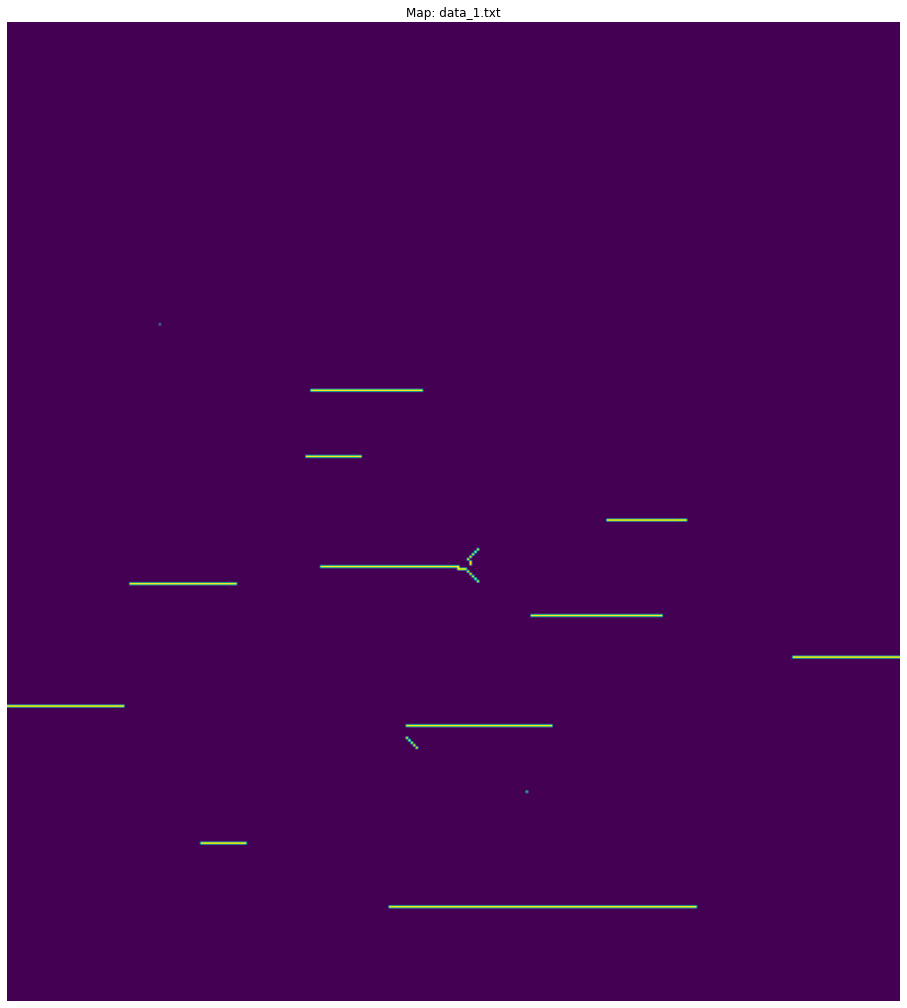

In [34]:
map1_file = "data_1.txt"
map1, map1_grid, map1_start, map1_goal, map1_four_w, map1_eight_w = read_map_file(map1_file)
# Create a copy of map for visualization
map1_m4 = map1.copy()
map1_e4 = map1.copy()
map1_m8 = map1.copy()
map1_e8 = map1.copy()

## Conduct 4-Ways A* Search on data_1.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(123, 62), (123, 63), (123, 64), (123, 65), (123, 66), (123, 67), (123, 68), (123, 69), (123, 70), (123, 71), (123, 72), (123, 73), (123, 74), (123, 75), (123, 76), (123, 77), (123, 78), (123, 79), (123, 80), (123, 81), (123, 82), (123, 83), (123, 84), (123, 85), (123, 86), (123, 87), (123, 88), (123, 89), (123, 90), (123, 91), (123, 92), (123, 93), (123, 94), (123, 95), (123, 96), (123, 97), (123, 98), (123, 99), (123, 100), (123, 101), (123, 102), (123, 103), (123, 104), (123, 105), (123, 106), (123, 107), (123, 108), (123, 109), (123, 110), (123, 111), (123, 112), (123, 113), (123, 114), (123, 115), (123, 116), (123, 117), (123, 118), (123, 119), (123, 120), (123, 121), (124, 121), (125, 121), (126, 121), (127, 121), (128, 121), (129, 121), (130, 121), (131, 121), (132, 121), (133, 121), (134, 121), (135, 121), (136, 121), (137, 121), (138, 1

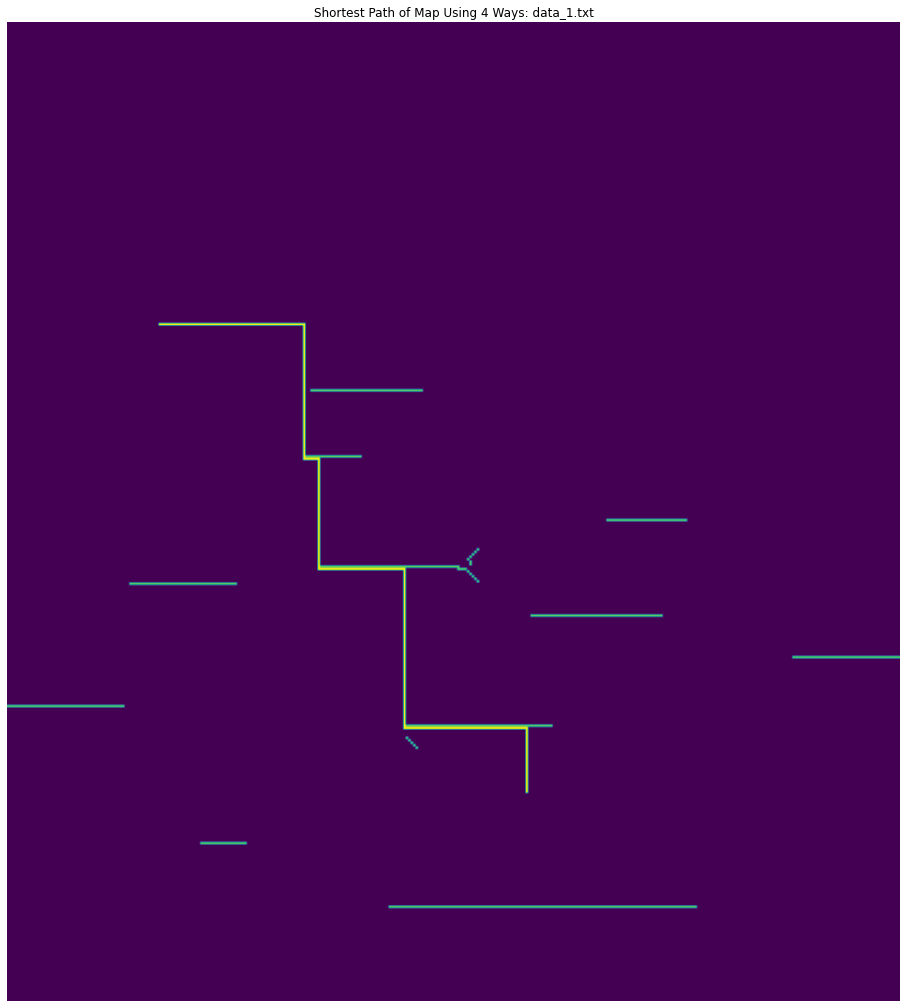

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(123, 62), (124, 62), (125, 62), (126, 62), (127, 62), (128, 62), (129, 62), (130, 62), (131, 62), (132, 62), (133, 62), (134, 62), (135, 62), (136, 62), (137, 62), (138, 62), (139, 62), (140, 62), (141, 62), (142, 62), (143, 62), (144, 62), (145, 62), (146, 62), (147, 62), (148, 62), (149, 62), (150, 62), (151, 62), (152, 62), (153, 62), (154, 62), (155, 62), (156, 62), (157, 62), (158, 62), (159, 62), (160, 62), (161, 62), (162, 62), (163, 62), (164, 62), (164, 63), (165, 63), (165, 64), (166, 64), (166, 65), (167, 65), (167, 66), (168, 66), (168, 67), (169, 67), (169, 68), (170, 68), (170, 69), (171, 69), (171, 70), (172, 70), (172, 71), (173, 71), (173, 72), (174, 72), (174, 73), (175, 73), (175, 74), (176, 74), (176, 75), (177, 75), (177, 76), (178, 76), (178, 77), (179, 77), (179, 78), (180, 78), (180, 79), (181, 79), (181, 80), (182, 80),

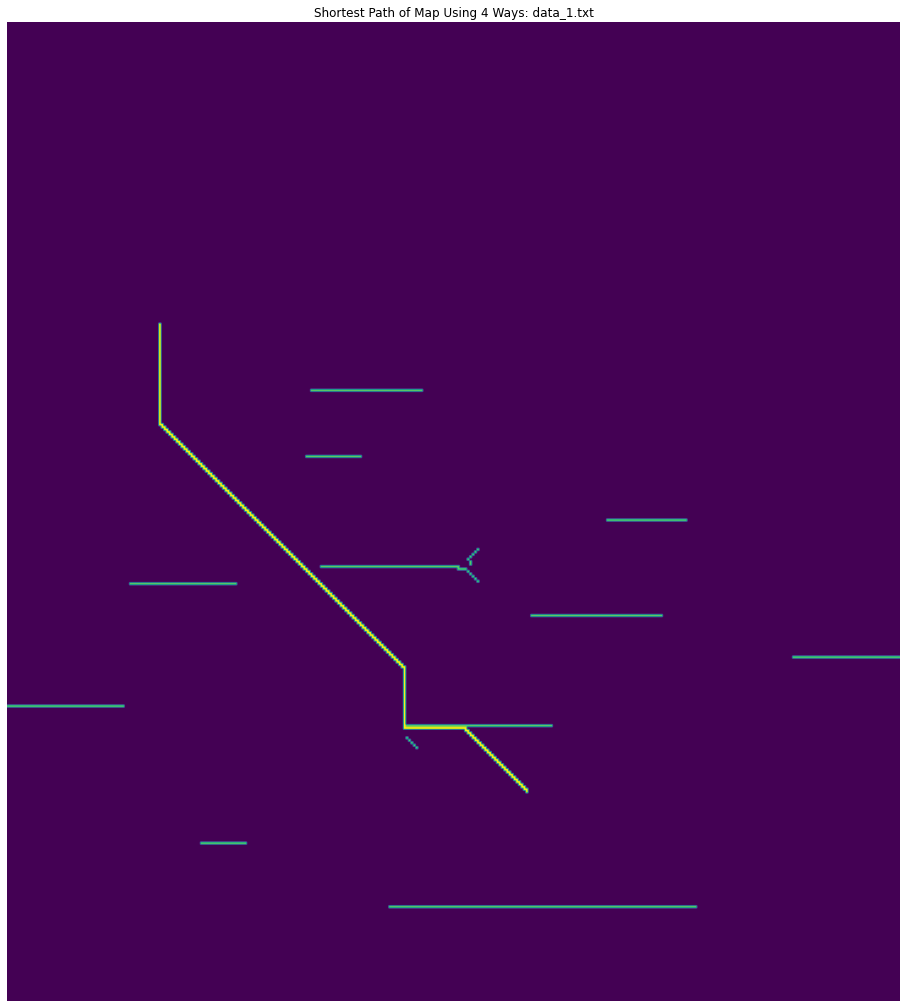

In [66]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map1_file, map1_m4, map1_grid, map1_start, map1_goal, map1_four_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map1_file, map1_e4, map1_grid, map1_start, map1_goal, map1_four_w, euclidean)

## Conduct 8-Ways A* Search on data_1.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(123, 62), (124, 62), (125, 62), (126, 62), (127, 62), (128, 62), (129, 62), (130, 62), (131, 62), (132, 62), (133, 62), (134, 62), (135, 62), (136, 62), (137, 62), (138, 62), (139, 62), (140, 62), (141, 62), (142, 62), (143, 62), (144, 62), (145, 62), (146, 62), (147, 62), (148, 62), (149, 62), (150, 62), (151, 62), (152, 62), (153, 62), (154, 62), (155, 62), (156, 62), (157, 62), (158, 62), (159, 62), (160, 62), (161, 62), (162, 62), (163, 62), (164, 62), (165, 62), (166, 62), (167, 62), (168, 62), (169, 62), (170, 62), (171, 62), (172, 62), (173, 62), (174, 62), (175, 62), (176, 62), (177, 62), (178, 62), (179, 62), (180, 62), (181, 62), (182, 62), (183, 62), (184, 62), (185, 62), (186, 62), (187, 62), (188, 63), (189, 64), (190, 65), (191, 66), (192, 67), (193, 68), (194, 69), (195, 70), (196, 71), (197, 72), (198, 73), (199, 74), (200, 75),

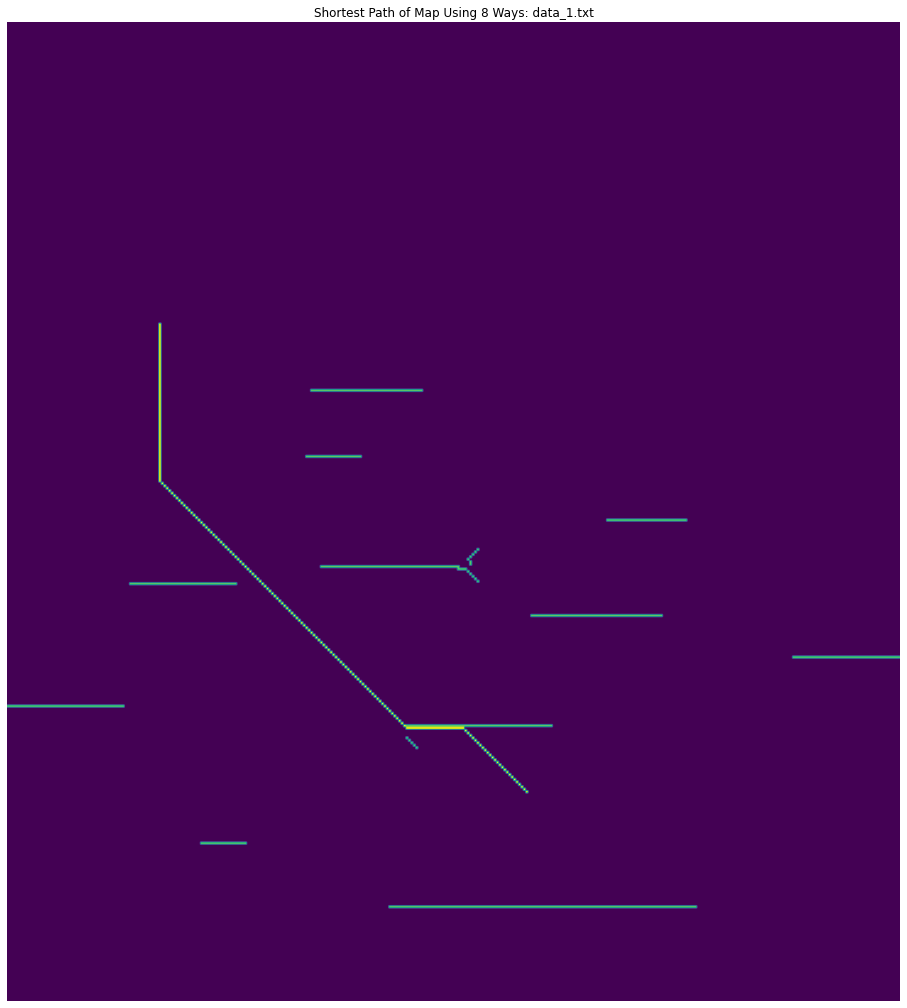

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(123, 62), (124, 62), (125, 62), (126, 62), (127, 62), (128, 62), (129, 62), (130, 62), (131, 62), (132, 62), (133, 62), (134, 62), (135, 62), (136, 62), (137, 62), (138, 62), (139, 62), (140, 62), (141, 62), (142, 62), (143, 62), (144, 62), (145, 62), (146, 62), (147, 62), (148, 62), (149, 62), (150, 62), (151, 62), (152, 62), (153, 62), (154, 62), (155, 62), (156, 62), (157, 62), (158, 62), (159, 62), (160, 62), (161, 62), (162, 62), (163, 62), (164, 62), (165, 62), (166, 62), (167, 62), (168, 62), (169, 62), (170, 62), (171, 62), (172, 62), (173, 62), (174, 62), (175, 62), (176, 62), (177, 62), (178, 62), (179, 62), (180, 62), (181, 62), (182, 62), (183, 62), (184, 62), (185, 62), (186, 62), (187, 62), (188, 63), (189, 64), (190, 65), (191, 66), (192, 67), (193, 68), (194, 69), (195, 70), (196, 71), (197, 72), (198, 73), (199, 74), (200, 75),

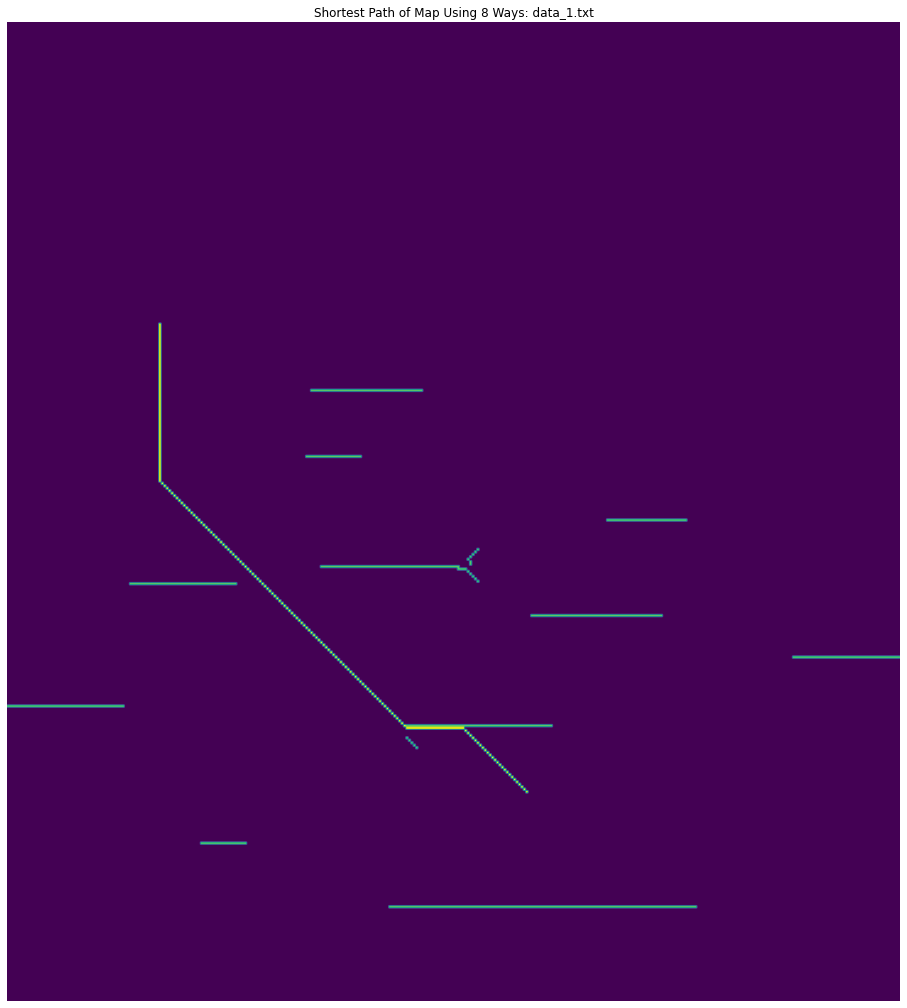

In [56]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map1_file, map1_m8, map1_grid, map1_start, map1_goal, map1_eight_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map1_file, map1_e8, map1_grid, map1_start, map1_goal, map1_eight_w, euclidean)

# Map of round_1.txt

Map size: 400 x 365
Start: (314, 212)
Goal: [(53, 276)]


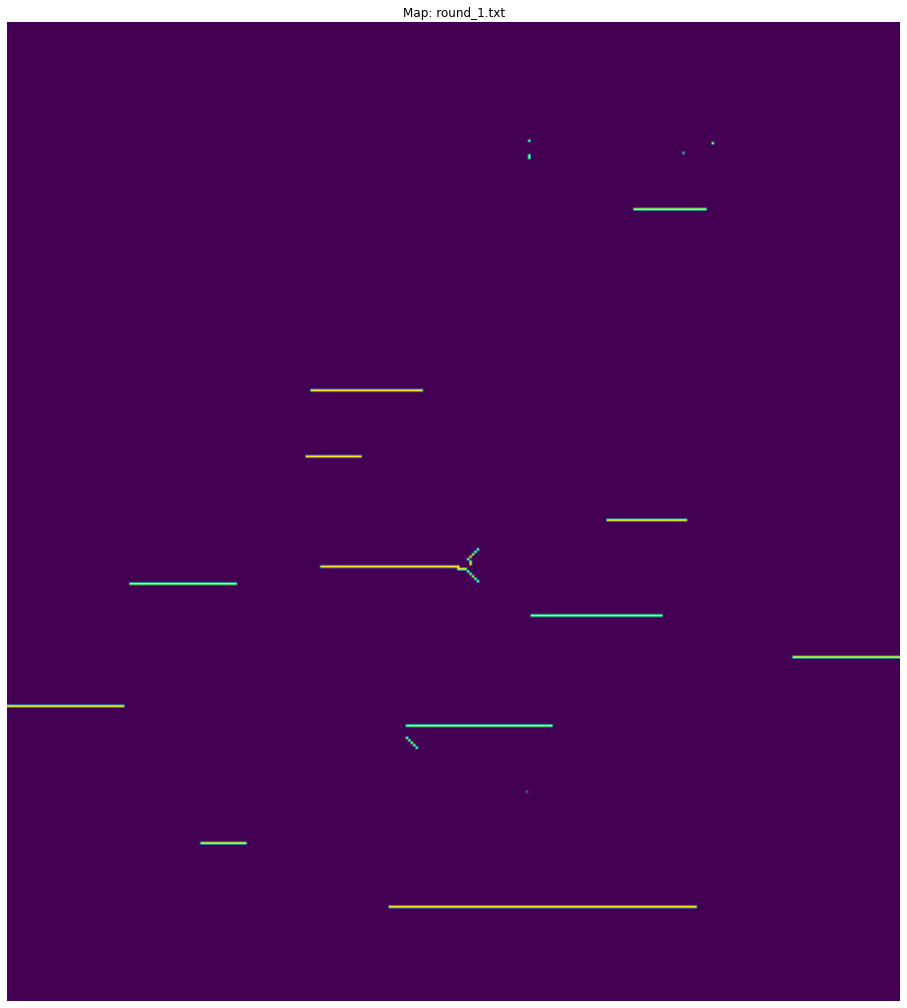

In [57]:
map2_file = "round_1.txt"
map2, map2_grid, map2_start, map2_goal, map2_four_w, map2_eight_w = read_map_file(map2_file)
map2_m4 = map2.copy()
map2_e4 = map2.copy()
map2_m8 = map2.copy()
map2_e8 = map2.copy()

## Conduct 4-Ways A* Search on round_1.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(314, 212), (313, 212), (312, 212), (311, 212), (310, 212), (309, 212), (308, 212), (307, 212), (306, 212), (305, 212), (304, 212), (303, 212), (302, 212), (301, 212), (300, 212), (299, 212), (298, 212), (297, 212), (296, 212), (295, 212), (294, 212), (293, 212), (292, 212), (291, 212), (290, 212), (289, 212), (288, 212), (288, 213), (288, 214), (288, 215), (288, 216), (288, 217), (288, 218), (288, 219), (288, 220), (288, 221), (288, 222), (288, 223), (287, 223), (286, 223), (285, 223), (284, 223), (283, 223), (282, 223), (281, 223), (280, 223), (279, 223), (278, 223), (277, 223), (276, 223), (275, 223), (274, 223), (273, 223), (272, 223), (271, 223), (270, 223), (269, 223), (268, 223), (267, 223), (266, 223), (265, 223), (264, 223), (263, 223), (262, 223), (261, 223), (260, 223), (259, 223), (258, 223), (257, 223), (256, 223), (255, 223), (254,

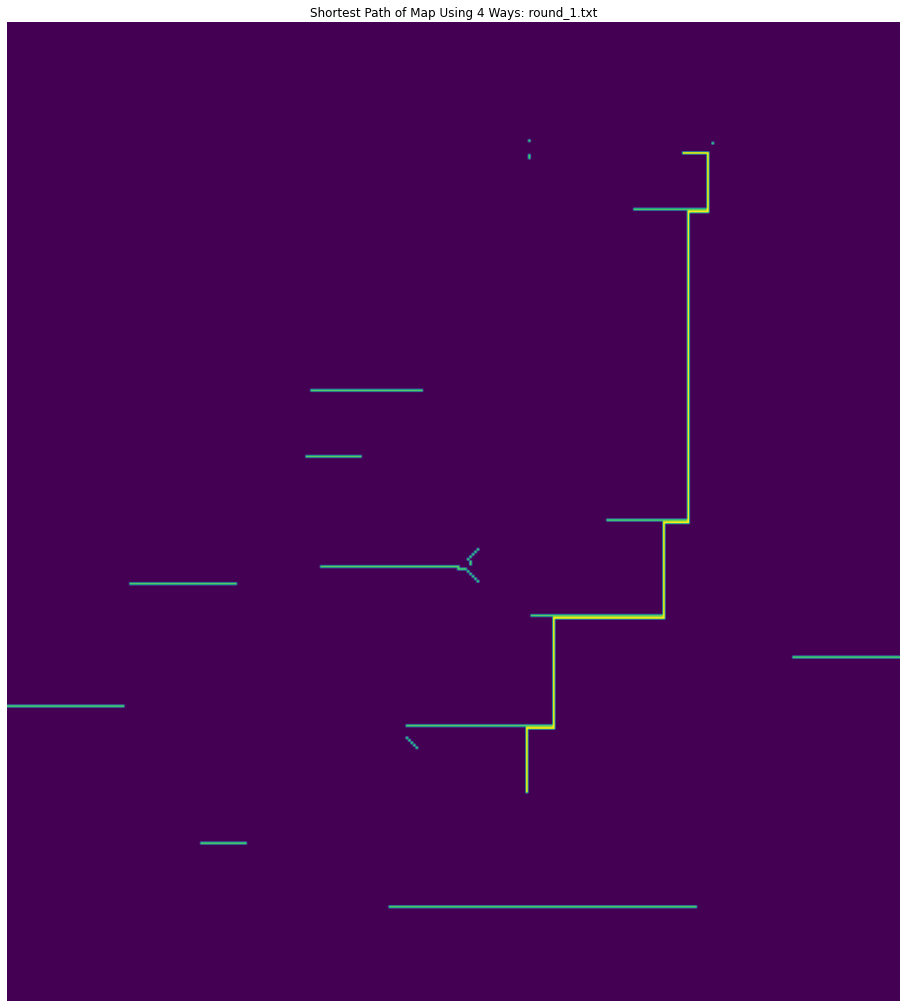

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(314, 212), (313, 212), (312, 212), (311, 212), (310, 212), (309, 212), (308, 212), (307, 212), (306, 212), (305, 212), (304, 212), (303, 212), (302, 212), (301, 212), (300, 212), (299, 212), (298, 212), (297, 212), (296, 212), (295, 212), (294, 212), (293, 212), (292, 212), (291, 212), (290, 212), (289, 212), (288, 212), (288, 213), (288, 214), (288, 215), (288, 216), (288, 217), (288, 218), (288, 219), (288, 220), (288, 221), (288, 222), (288, 223), (287, 223), (286, 223), (285, 223), (284, 223), (283, 223), (282, 223), (281, 223), (280, 223), (279, 223), (278, 223), (277, 223), (276, 223), (275, 223), (274, 223), (273, 223), (272, 223), (271, 223), (270, 223), (269, 223), (268, 223), (267, 223), (266, 223), (265, 223), (264, 223), (263, 223), (262, 223), (261, 223), (260, 223), (259, 223), (258, 223), (257, 223), (256, 223), (255, 223), (254,

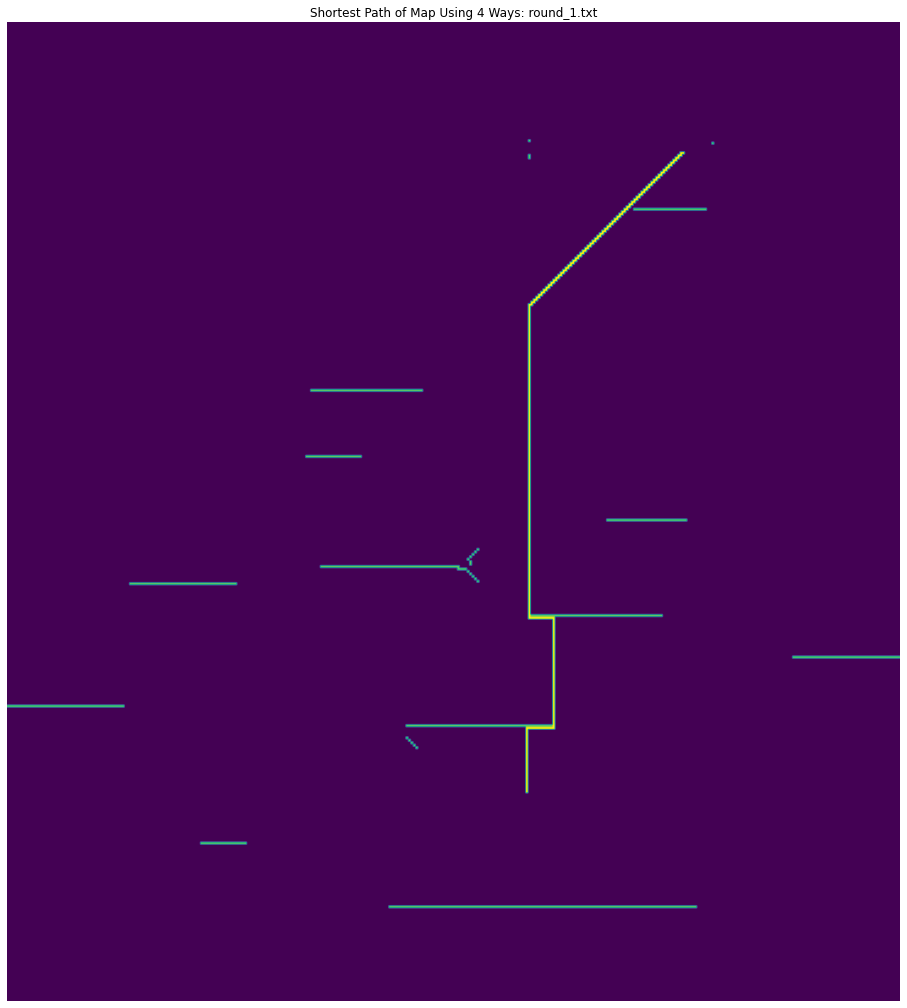

In [58]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map2_file, map2_m4, map2_grid, map2_start, map2_goal, map2_four_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map2_file, map2_e4, map2_grid, map2_start, map2_goal, map2_four_w, euclidean)

## Conduct 8-Ways A* Search on round_1.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(314, 212), (313, 212), (312, 212), (311, 212), (310, 212), (309, 212), (308, 212), (307, 212), (306, 212), (305, 212), (304, 212), (303, 212), (302, 212), (301, 212), (300, 212), (299, 212), (298, 212), (297, 213), (296, 214), (295, 215), (294, 216), (293, 217), (292, 218), (291, 219), (290, 220), (289, 221), (288, 222), (287, 223), (286, 223), (285, 223), (284, 223), (283, 223), (282, 223), (281, 223), (280, 223), (279, 223), (278, 223), (277, 223), (276, 223), (275, 223), (274, 223), (273, 223), (272, 223), (271, 223), (270, 223), (269, 223), (268, 223), (267, 223), (266, 223), (265, 223), (264, 223), (263, 223), (262, 223), (261, 223), (260, 223), (259, 223), (258, 223), (257, 223), (256, 223), (255, 223), (254, 223), (253, 223), (252, 223), (251, 222), (250, 221), (249, 220), (248, 219), (247, 218), (246, 217), (245, 216), (244, 215), (243,

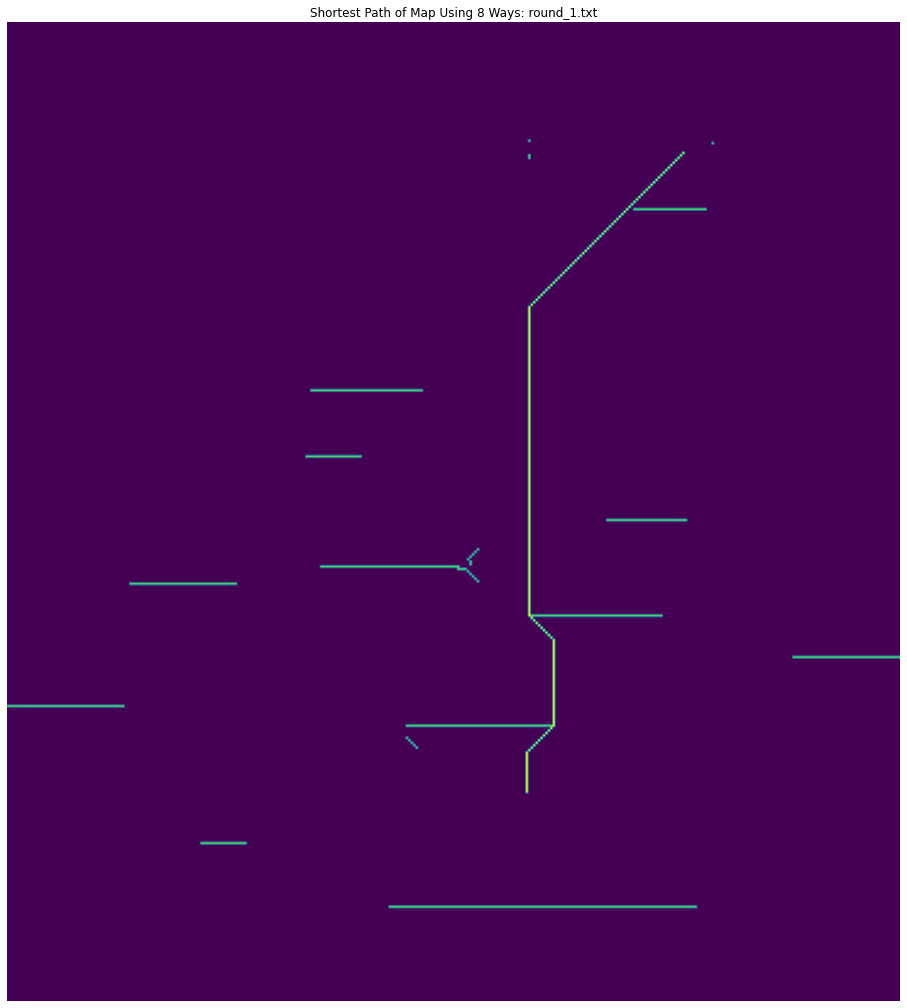

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(314, 212), (313, 212), (312, 212), (311, 212), (310, 212), (309, 212), (308, 212), (307, 212), (306, 212), (305, 212), (304, 212), (303, 212), (302, 212), (301, 212), (300, 212), (299, 212), (298, 212), (297, 213), (296, 214), (295, 215), (294, 216), (293, 217), (292, 218), (291, 219), (290, 220), (289, 221), (288, 222), (287, 223), (286, 223), (285, 223), (284, 223), (283, 223), (282, 223), (281, 223), (280, 223), (279, 223), (278, 223), (277, 223), (276, 223), (275, 223), (274, 223), (273, 223), (272, 223), (271, 223), (270, 223), (269, 223), (268, 223), (267, 223), (266, 223), (265, 223), (264, 223), (263, 223), (262, 223), (261, 223), (260, 223), (259, 223), (258, 223), (257, 223), (256, 223), (255, 223), (254, 223), (253, 223), (252, 223), (251, 222), (250, 221), (249, 220), (248, 219), (247, 218), (246, 217), (245, 216), (244, 215), (243,

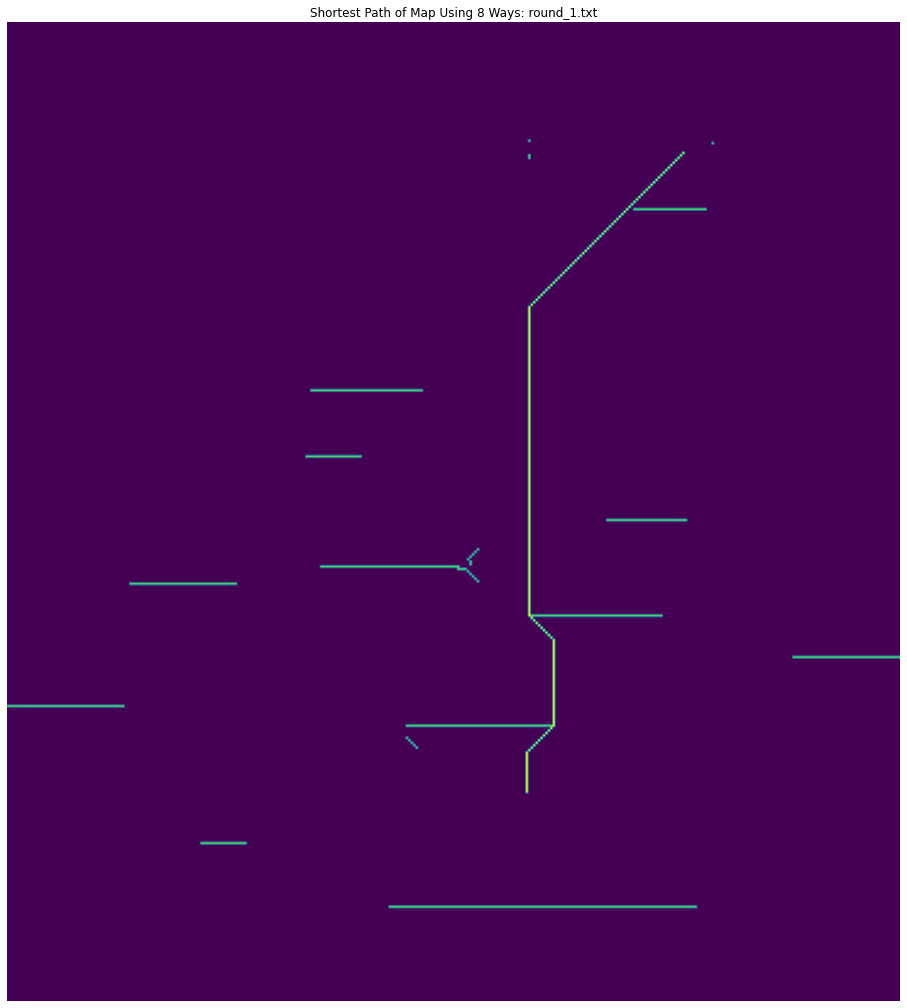

In [59]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map2_file, map2_m8, map2_grid, map2_start, map2_goal, map2_eight_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map2_file, map2_e8, map2_grid, map2_start, map2_goal, map2_eight_w, euclidean)

# Map of round_2.txt

Map size: 400 x 365
Start: (222, 248)
Goal: [(51, 231), (247, 53)]


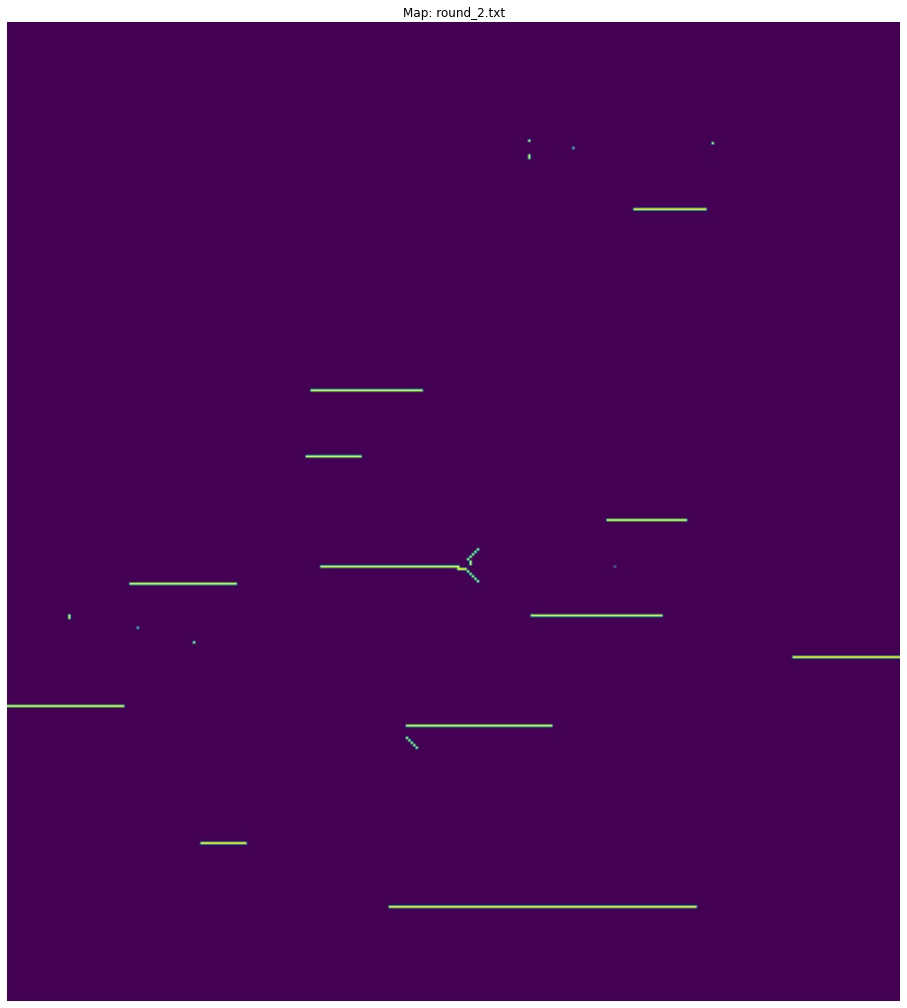

In [60]:
map3_file = "round_2.txt"
map3, map3_grid, map3_start, map3_goal, map3_four_w, map3_eight_w = read_map_file(map3_file)
map3_m4 = map3.copy()
map3_e4 = map3.copy()
map3_m8 = map3.copy()
map3_e8 = map3.copy()

## Conduct 4-Ways A* Search on round_2.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(222, 248), (221, 248), (220, 248), (219, 248), (218, 248), (217, 248), (216, 248), (215, 248), (214, 248), (213, 248), (212, 248), (211, 248), (210, 248), (209, 248), (208, 248), (207, 248), (206, 248), (205, 248), (204, 248), (204, 247), (204, 246), (204, 245), (204, 244), (203, 244), (202, 244), (201, 244), (200, 244), (199, 244), (198, 244), (197, 244), (196, 244), (195, 244), (194, 244), (193, 244), (192, 244), (191, 244), (190, 244), (189, 244), (188, 244), (187, 244), (186, 244), (185, 244), (184, 244), (183, 244), (182, 244), (181, 244), (180, 244), (179, 244), (178, 244), (177, 244), (176, 244), (175, 244), (174, 244), (173, 244), (172, 244), (171, 244), (170, 244), (169, 244), (168, 244), (167, 244), (166, 244), (165, 244), (164, 244), (163, 244), (162, 244), (161, 244), (160, 244), (159, 244), (158, 244), (157, 244), (156, 244), (155,

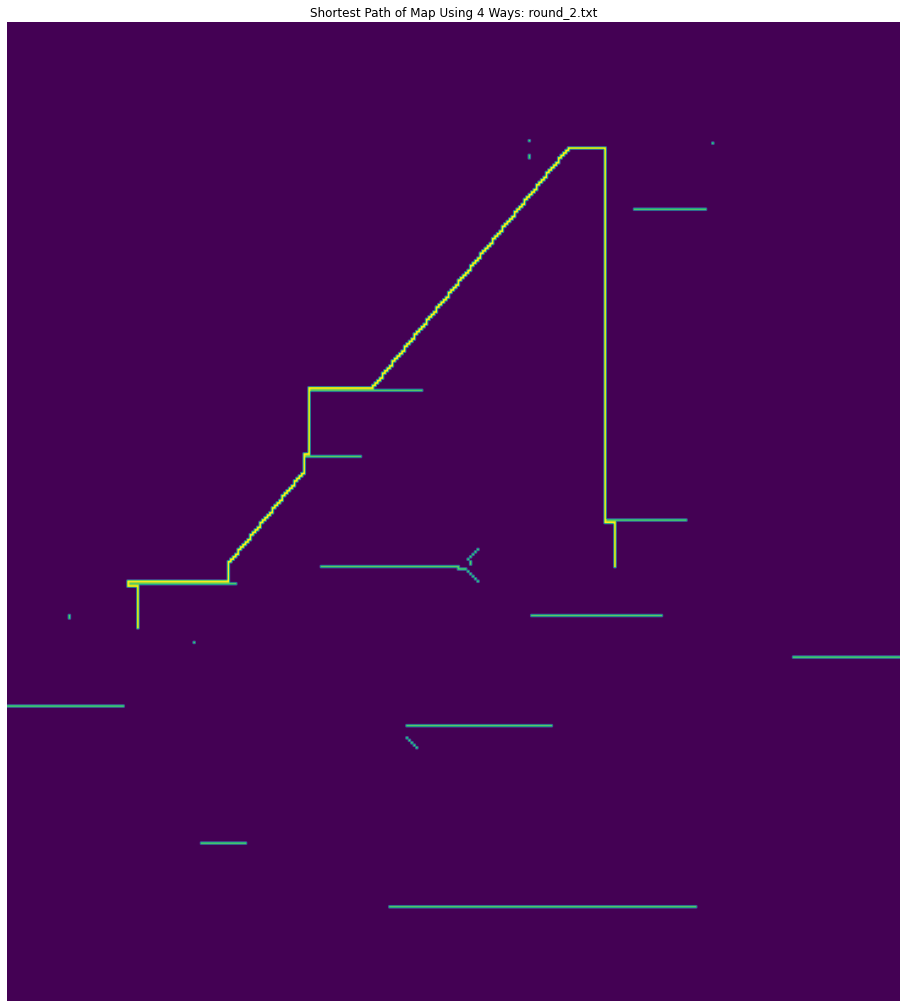

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(222, 248), (221, 248), (220, 248), (219, 248), (218, 248), (217, 248), (216, 248), (215, 248), (214, 248), (213, 248), (212, 248), (211, 248), (210, 248), (209, 248), (208, 248), (207, 248), (206, 248), (205, 248), (204, 248), (204, 247), (204, 246), (204, 245), (204, 244), (203, 244), (202, 244), (201, 244), (200, 244), (199, 244), (198, 244), (197, 244), (196, 244), (195, 244), (194, 244), (193, 244), (192, 244), (191, 244), (190, 244), (189, 244), (188, 244), (187, 244), (186, 244), (185, 244), (184, 244), (183, 244), (182, 244), (181, 244), (180, 244), (179, 244), (178, 244), (177, 244), (176, 244), (175, 244), (174, 244), (173, 244), (172, 244), (171, 244), (170, 244), (169, 244), (168, 244), (167, 244), (166, 244), (165, 244), (164, 244), (163, 244), (162, 244), (161, 244), (160, 244), (159, 244), (158, 244), (157, 244), (156, 244), (155,

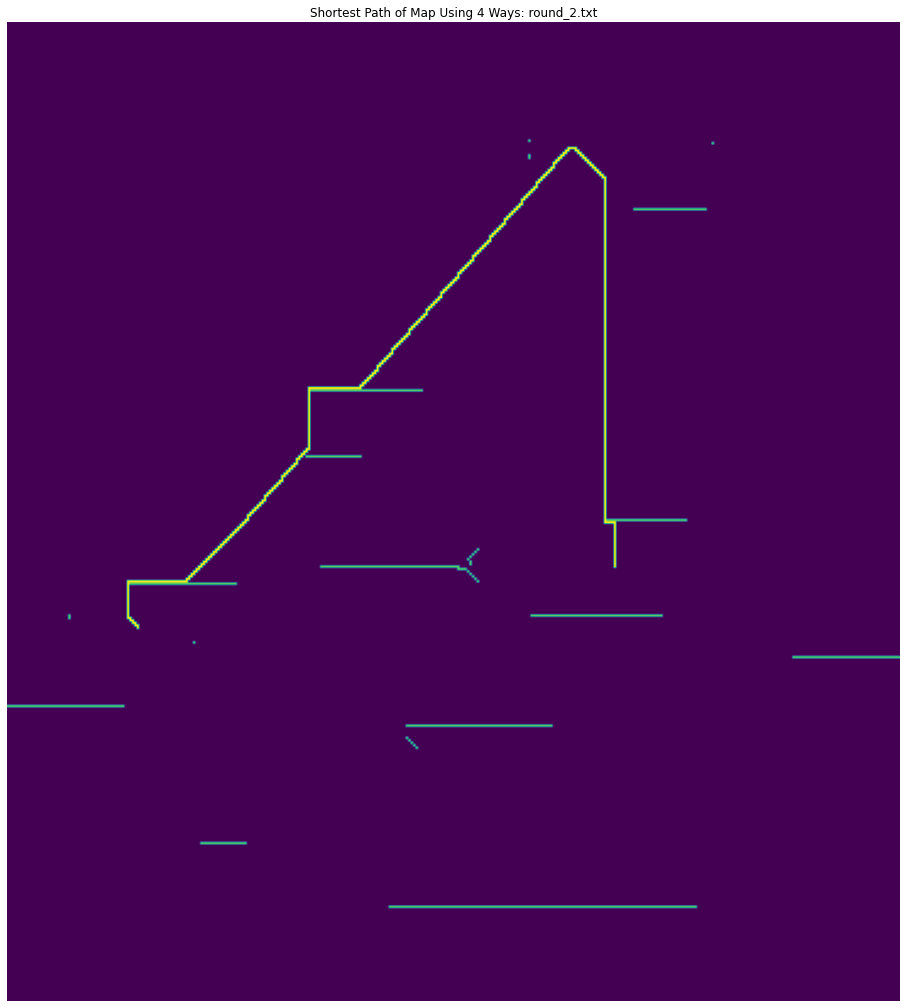

In [61]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map3_file, map3_m4, map3_grid, map3_start, map3_goal, map3_four_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map3_file, map3_e4, map3_grid, map3_start, map3_goal, map3_four_w, euclidean)

## Conduct 8-Ways A* Search on round_2.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(222, 248), (221, 248), (220, 248), (219, 248), (218, 248), (217, 248), (216, 248), (215, 248), (214, 248), (213, 248), (212, 248), (211, 248), (210, 248), (209, 248), (208, 248), (207, 248), (206, 247), (205, 246), (204, 245), (203, 244), (202, 244), (201, 244), (200, 244), (199, 244), (198, 244), (197, 244), (196, 244), (195, 244), (194, 244), (193, 244), (192, 244), (191, 244), (190, 244), (189, 244), (188, 244), (187, 244), (186, 244), (185, 244), (184, 244), (183, 244), (182, 244), (181, 244), (180, 244), (179, 244), (178, 244), (177, 244), (176, 244), (175, 244), (174, 244), (173, 244), (172, 244), (171, 244), (170, 244), (169, 244), (168, 244), (167, 244), (166, 244), (165, 244), (164, 244), (163, 244), (162, 244), (161, 244), (160, 244), (159, 244), (158, 244), (157, 244), (156, 244), (155, 244), (154, 244), (153, 244), (152, 244), (151,

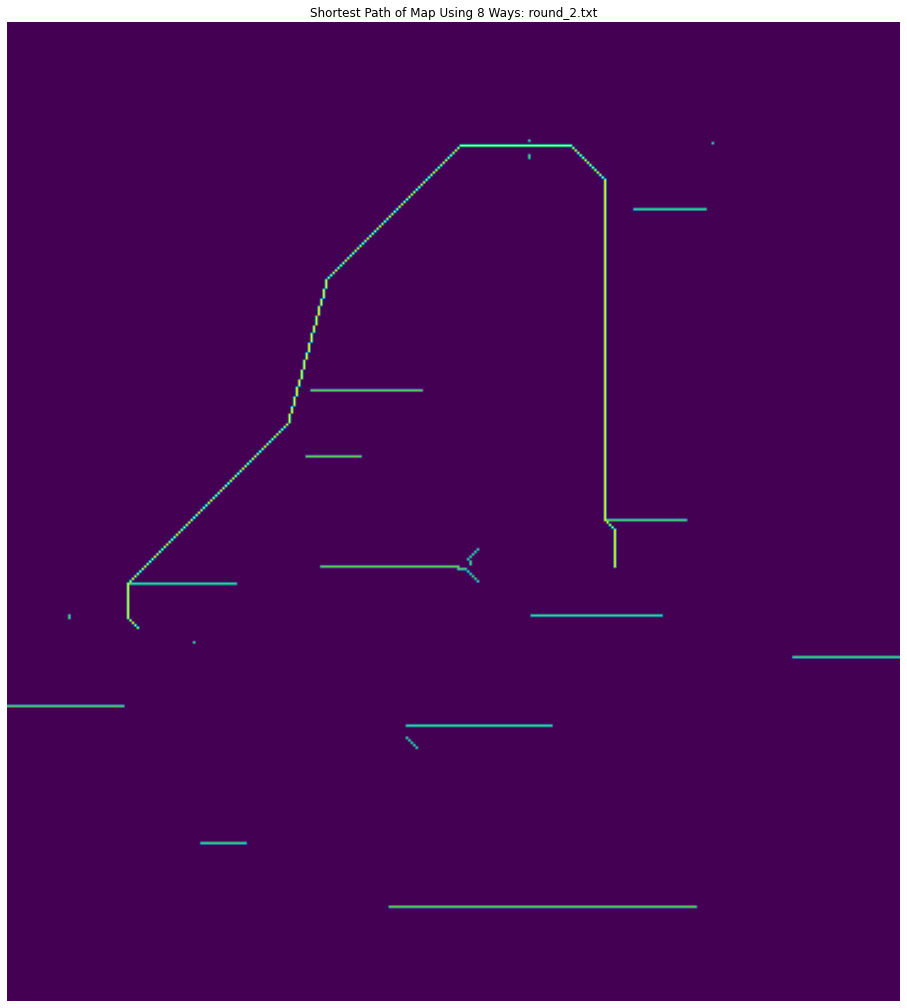

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(222, 248), (221, 248), (220, 248), (219, 248), (218, 248), (217, 248), (216, 248), (215, 248), (214, 248), (213, 248), (212, 248), (211, 248), (210, 248), (209, 248), (208, 248), (207, 248), (206, 247), (205, 246), (204, 245), (203, 244), (202, 244), (201, 244), (200, 244), (199, 244), (198, 244), (197, 244), (196, 244), (195, 244), (194, 244), (193, 244), (192, 244), (191, 244), (190, 244), (189, 244), (188, 244), (187, 244), (186, 244), (185, 244), (184, 244), (183, 244), (182, 244), (181, 244), (180, 244), (179, 244), (178, 244), (177, 244), (176, 244), (175, 244), (174, 244), (173, 244), (172, 244), (171, 244), (170, 244), (169, 244), (168, 244), (167, 244), (166, 244), (165, 244), (164, 244), (163, 244), (162, 244), (161, 244), (160, 244), (159, 244), (158, 244), (157, 244), (156, 244), (155, 244), (154, 244), (153, 244), (152, 244), (151,

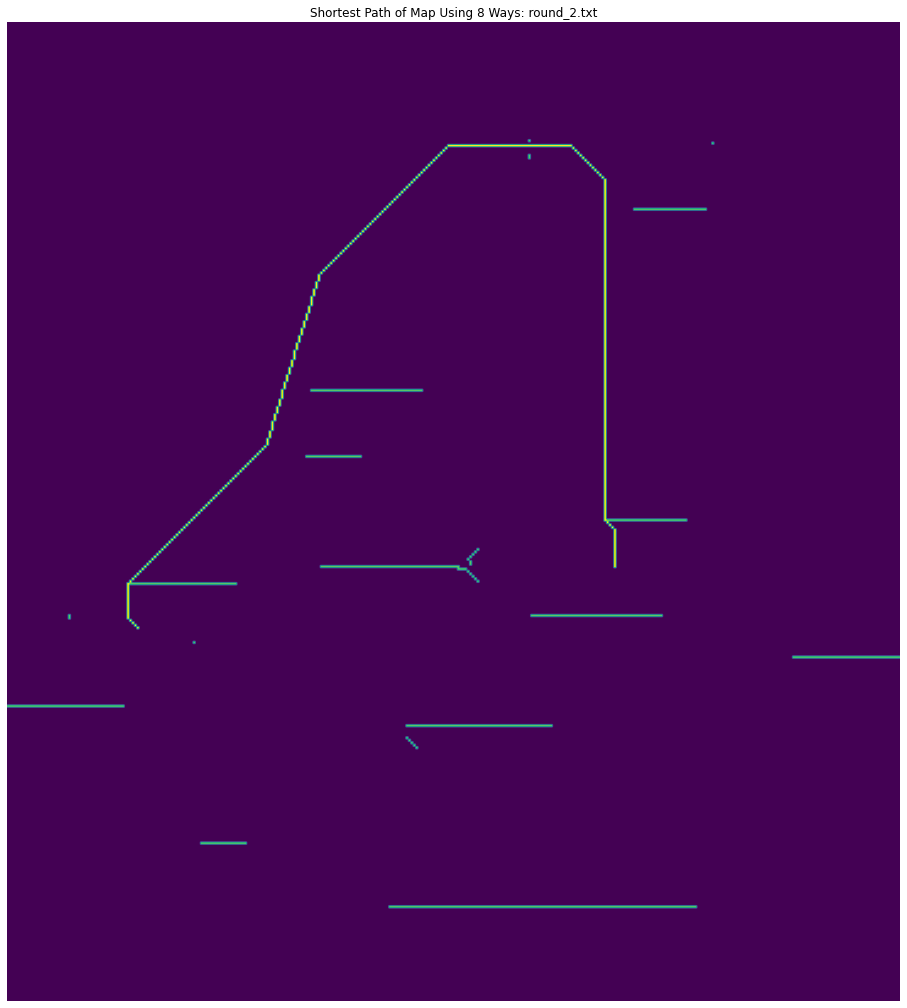

In [62]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map3_file, map3_m8, map3_grid, map3_start, map3_goal, map3_eight_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map3_file, map3_e8, map3_grid, map3_start, map3_goal, map3_eight_w, euclidean)

# Map of round_3.txt

Map size: 400 x 365
Start: (192, 125)
Goal: [(52, 88), (294, 200), (376, 226)]


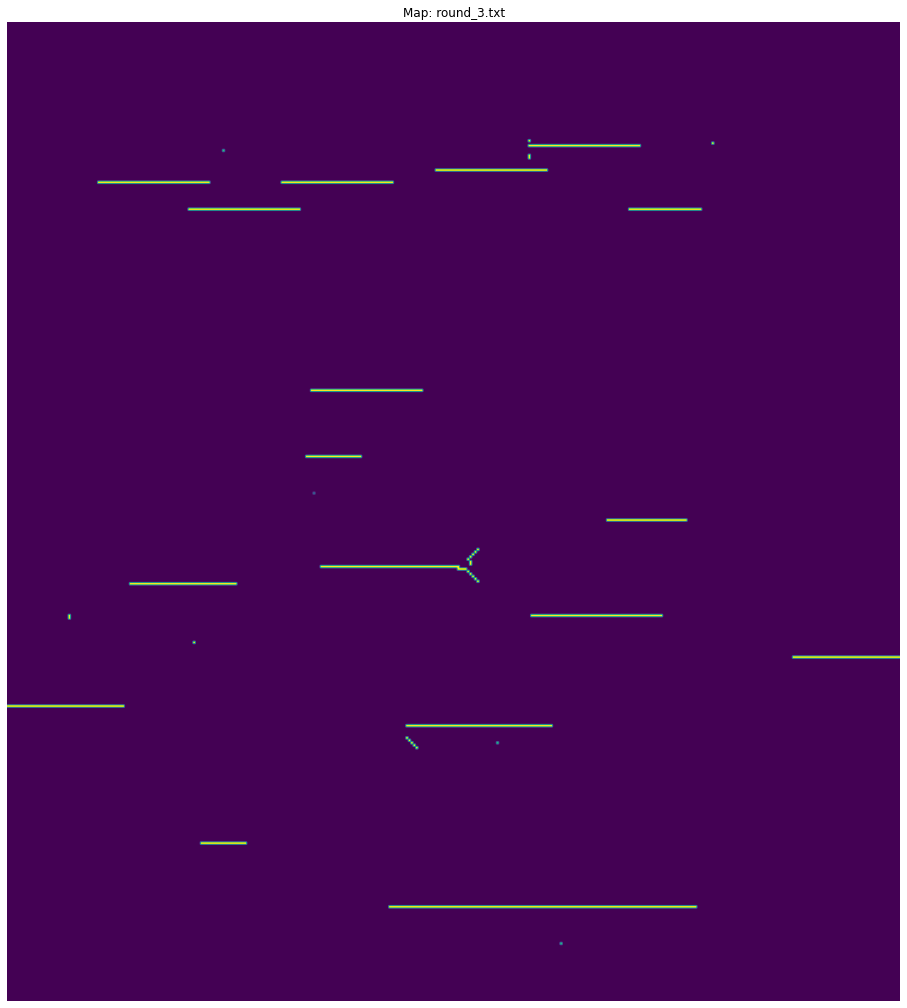

In [63]:
map4_file = "round_3.txt"
map4, map4_grid, map4_start, map4_goal, map4_four_w, map4_eight_w = read_map_file(map4_file)
map4_m4 = map4.copy()
map4_e4 = map4.copy()
map4_m8 = map4.copy()
map4_e8 = map4.copy()

## Conduct 4-Ways A* Search on round_3.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(192, 125), (191, 125), (190, 125), (189, 125), (188, 125), (187, 125), (186, 125), (185, 125), (184, 125), (183, 125), (182, 125), (181, 125), (180, 125), (179, 125), (178, 125), (178, 124), (178, 123), (178, 122), (178, 121), (177, 121), (176, 121), (175, 121), (174, 121), (173, 121), (172, 121), (171, 121), (170, 121), (169, 121), (168, 121), (167, 121), (166, 121), (165, 121), (164, 121), (163, 121), (162, 121), (161, 121), (160, 121), (159, 121), (158, 121), (157, 121), (156, 121), (155, 121), (154, 121), (153, 121), (152, 121), (151, 121), (150, 121), (149, 121), (148, 121), (147, 121), (146, 121), (145, 121), (144, 121), (143, 121), (142, 121), (141, 121), (140, 121), (139, 121), (138, 121), (137, 121), (136, 121), (135, 121), (134, 121), (133, 121), (132, 121), (131, 121), (130, 121), (129, 121), (128, 121), (127, 121), (126, 121), (125,

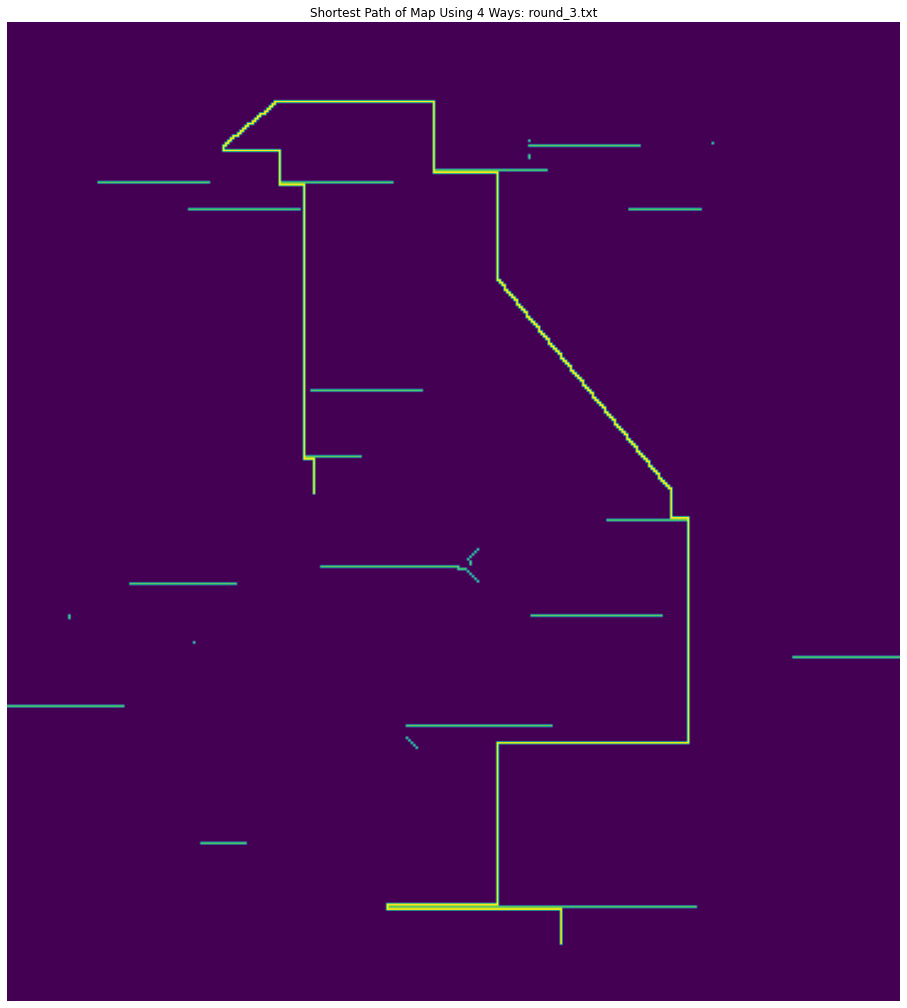

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(192, 125), (191, 125), (190, 125), (189, 125), (188, 125), (187, 125), (186, 125), (185, 125), (184, 125), (183, 125), (182, 125), (181, 125), (180, 125), (179, 125), (178, 125), (178, 124), (178, 123), (178, 122), (178, 121), (177, 121), (176, 121), (175, 121), (174, 121), (173, 121), (172, 121), (171, 121), (170, 121), (169, 121), (168, 121), (167, 121), (166, 121), (165, 121), (164, 121), (163, 121), (162, 121), (161, 121), (160, 121), (159, 121), (158, 121), (157, 121), (156, 121), (155, 121), (154, 121), (153, 121), (152, 121), (151, 121), (150, 121), (149, 121), (148, 121), (147, 121), (146, 121), (145, 121), (144, 121), (143, 121), (142, 121), (141, 121), (140, 121), (139, 121), (138, 121), (137, 121), (136, 121), (135, 121), (134, 121), (133, 121), (132, 121), (131, 121), (130, 121), (129, 121), (128, 121), (127, 121), (126, 121), (125,

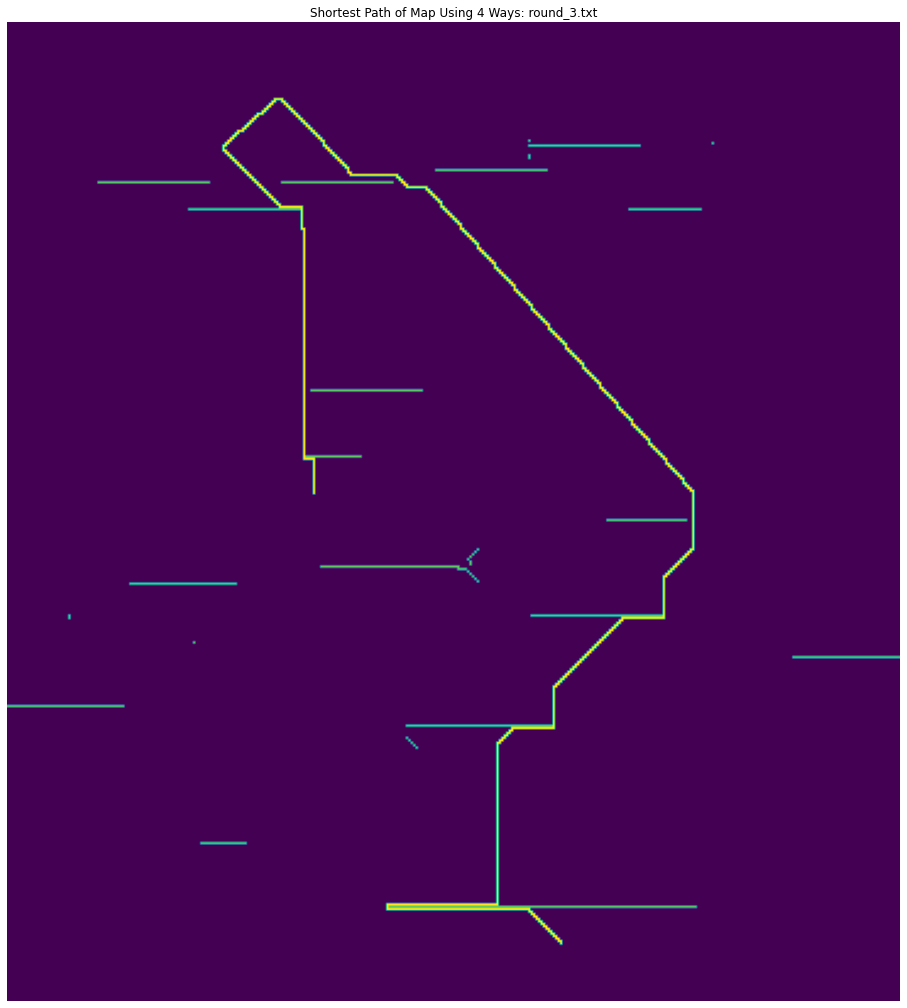

In [64]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map4_file, map4_m4, map4_grid, map4_start, map4_goal, map4_four_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_four_way(map4_file, map4_e4, map4_grid, map4_start, map4_goal, map4_four_w, euclidean)

## Conduct 8-Ways A* Search on round_3.txt

-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------

Shortest path: [(192, 125), (191, 125), (190, 125), (189, 125), (188, 125), (187, 125), (186, 125), (185, 125), (184, 125), (183, 125), (182, 125), (181, 125), (180, 124), (179, 123), (178, 122), (177, 121), (176, 121), (175, 121), (174, 121), (173, 121), (172, 121), (171, 121), (170, 121), (169, 121), (168, 121), (167, 121), (166, 121), (165, 121), (164, 121), (163, 121), (162, 121), (161, 121), (160, 121), (159, 121), (158, 121), (157, 121), (156, 121), (155, 121), (154, 121), (153, 121), (152, 121), (151, 121), (150, 121), (149, 121), (148, 121), (147, 121), (146, 121), (145, 121), (144, 121), (143, 121), (142, 121), (141, 121), (140, 121), (139, 121), (138, 121), (137, 121), (136, 121), (135, 121), (134, 121), (133, 121), (132, 121), (131, 121), (130, 121), (129, 121), (128, 121), (127, 121), (126, 121), (125, 121), (124, 121), (123, 121), (122, 121), (121,

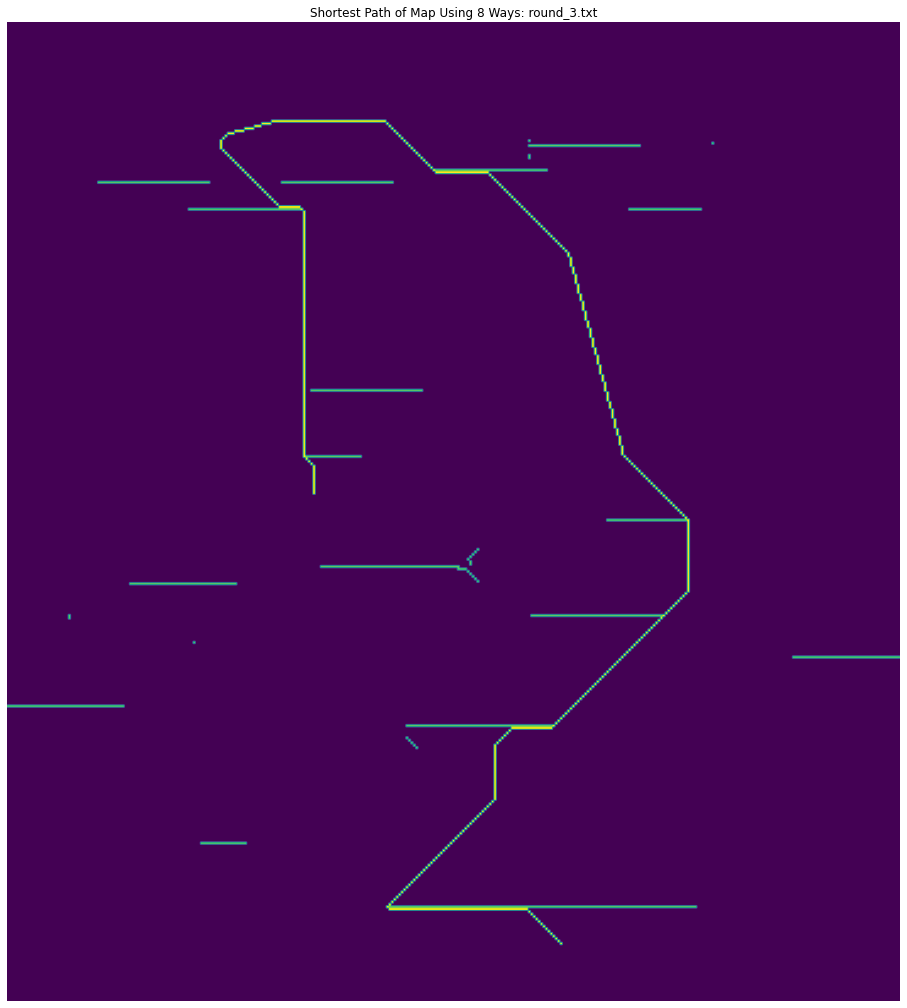

-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------

Shortest path: [(192, 125), (191, 125), (190, 125), (189, 125), (188, 125), (187, 125), (186, 125), (185, 125), (184, 125), (183, 125), (182, 125), (181, 125), (180, 124), (179, 123), (178, 122), (177, 121), (176, 121), (175, 121), (174, 121), (173, 121), (172, 121), (171, 121), (170, 121), (169, 121), (168, 121), (167, 121), (166, 121), (165, 121), (164, 121), (163, 121), (162, 121), (161, 121), (160, 121), (159, 121), (158, 121), (157, 121), (156, 121), (155, 121), (154, 121), (153, 121), (152, 121), (151, 121), (150, 121), (149, 121), (148, 121), (147, 121), (146, 121), (145, 121), (144, 121), (143, 121), (142, 121), (141, 121), (140, 121), (139, 121), (138, 121), (137, 121), (136, 121), (135, 121), (134, 121), (133, 121), (132, 121), (131, 121), (130, 121), (129, 121), (128, 121), (127, 121), (126, 121), (125, 121), (124, 121), (123, 121), (122, 121), (121,

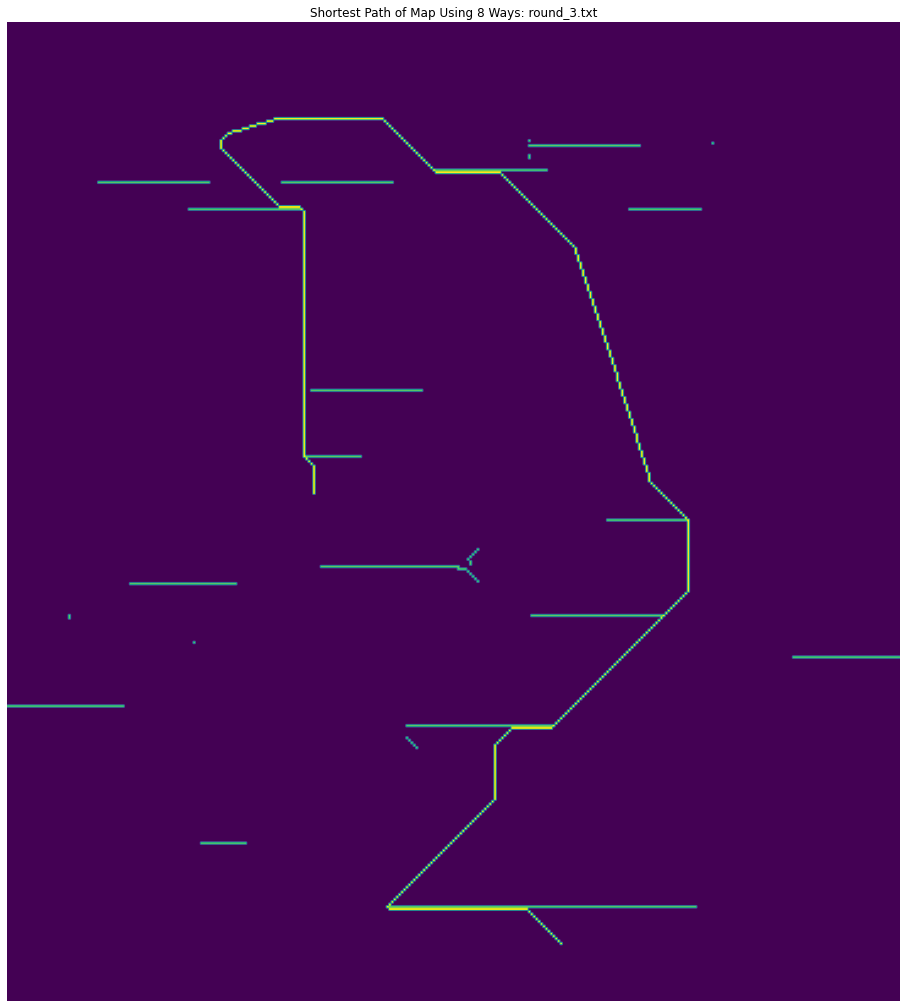

In [65]:
print("-------------------------------------- Using Manhattan Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map4_file, map4_m8, map4_grid, map4_start, map4_goal, map4_eight_w, manhattan)


print("-------------------------------------- Using Euclidean Distance as Heuristic Function ---------------------------------------\n")
astar_eight_way(map4_file, map4_e8, map4_grid, map4_start, map4_goal, map4_eight_w, euclidean)